# Practice Session: Palmer Penguins dataset

**TODO** introduce the dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Loading and visualizing the dataset

**TODO** hint Iris dataset

In [2]:
from datasets import load_penguins

In [3]:
penguins = load_penguins()

In [4]:
penguins.data.shape

(333, 9)

In [5]:
penguins.feature_names

array(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Island Biscoe', 'Island Dream',
       'Island Torgersen', 'Sex FEMALE', 'Sex MALE'], dtype=object)

In [6]:
penguins.target

0      0
1      0
2      0
3      0
4      0
      ..
328    1
329    1
330    1
331    1
332    1
Length: 333, dtype: int8

In [7]:
penguins.target_names

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

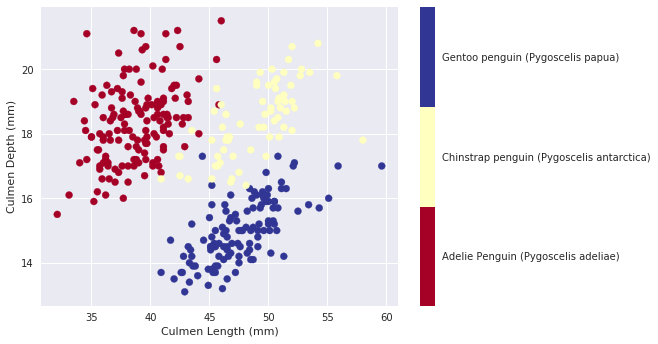

In [8]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: penguins.target_names[int(i)])

plt.scatter(penguins.data[:, x_index], penguins.data[:, y_index],
            c=penguins.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(penguins.feature_names[x_index])
plt.ylabel(penguins.feature_names[y_index]);

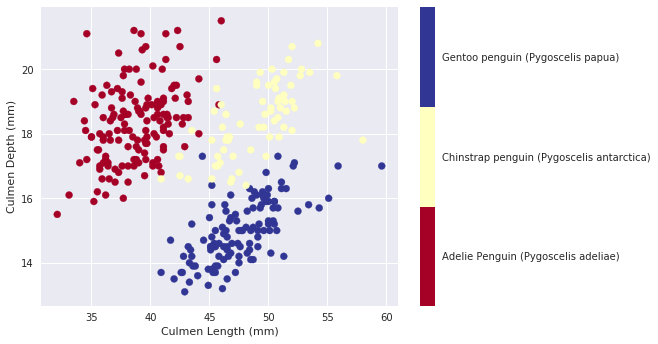

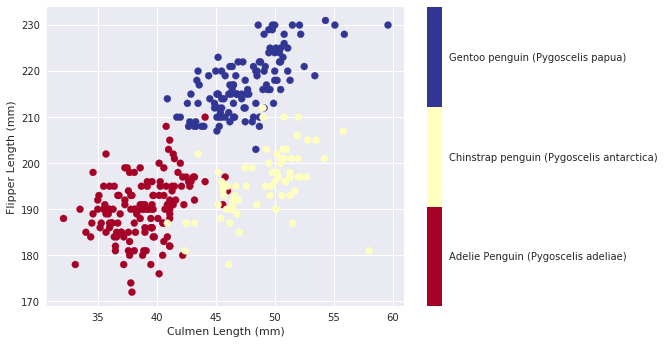

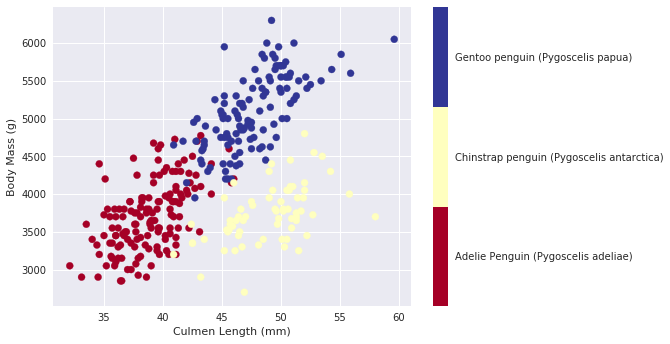

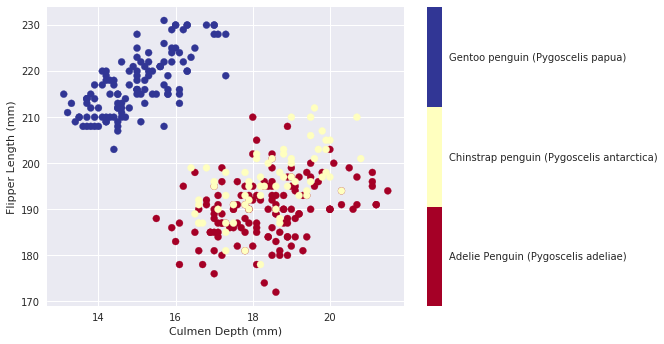

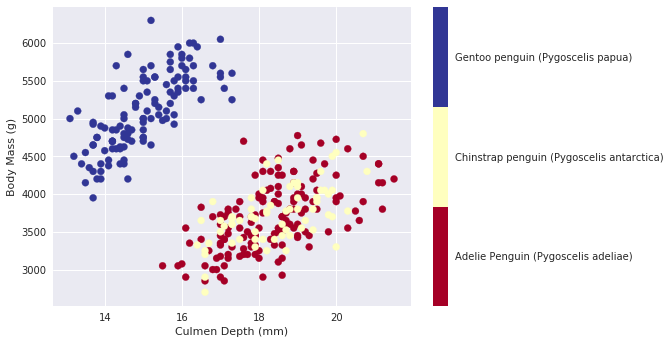

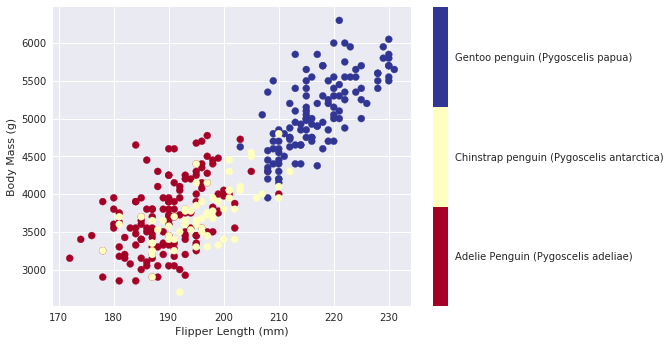

In [9]:
def plot_pair(x_index, y_index):
    plt.figure()
    formatter = plt.FuncFormatter(lambda i, *args: penguins.target_names[int(i)])

    plt.scatter(penguins.data[:, x_index], penguins.data[:, y_index],
                c=penguins.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.clim(-0.5, 2.5)
    plt.xlabel(penguins.feature_names[x_index])
    plt.ylabel(penguins.feature_names[y_index])


for i in range(4):
    for j in range(i + 1, 4):
        plot_pair(i, j)

## Define the task

**TODO** what are we trying to achieve?

## Fit a baseline model: logistic regression

**TODO** hint Classification on digits

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    penguins.data, penguins.target, random_state=42
)
print(Xtrain.shape, Xtest.shape)

(249, 9) (84, 9)


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
ypred = model.predict(Xtest)
print(f"{np.sum(ytest == ypred)} / {len(ytest)} correct")

83 / 84 correct


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9880952380952381

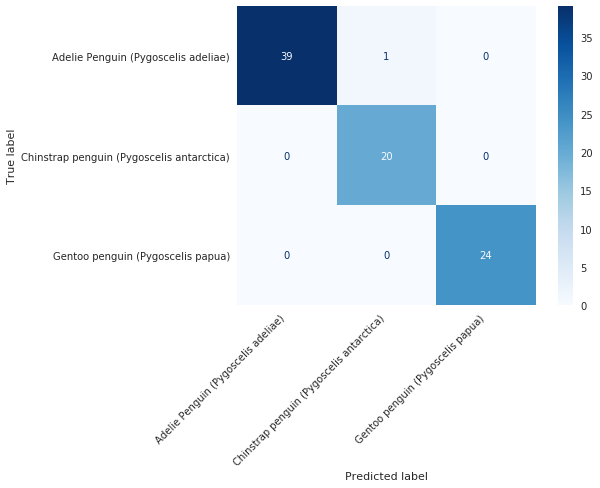

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, Xtest, ytest, cmap=plt.cm.Blues)
plt.grid(False)
plt.yticks([0, 1, 2], labels=penguins.target_names)
plt.xticks([0, 1, 2], labels=penguins.target_names, rotation=45, ha="right");

**TODO** hint cross-validation

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(model, penguins.data, penguins.target, cv=cv)

print("Logistic regression accuracy")
print(f"- average: {np.mean(logreg_scores)}")
print(f"- CV folds: {logreg_scores.tolist()}")

Logistic regression accuracy
- average: 0.9909543193125282
- CV folds: [1.0, 0.9850746268656716, 1.0, 1.0, 0.9696969696969697]


In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
ypreds = cross_val_predict(model, penguins.data, penguins.target, cv=cv)
print(confusion_matrix(penguins.target, ypreds))

[[145   1   0]
 [  2  66   0]
 [  0   0 119]]


## Fit a random forest model

**TODO** hint random forest section

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
ypred = model.predict(Xtest)
print(f"{np.sum(ytest == ypred)} / {len(ytest)} correct")
print(f"accuracy {accuracy_score(ytest, ypred)}")

83 / 84 correct
accuracy 0.9880952380952381


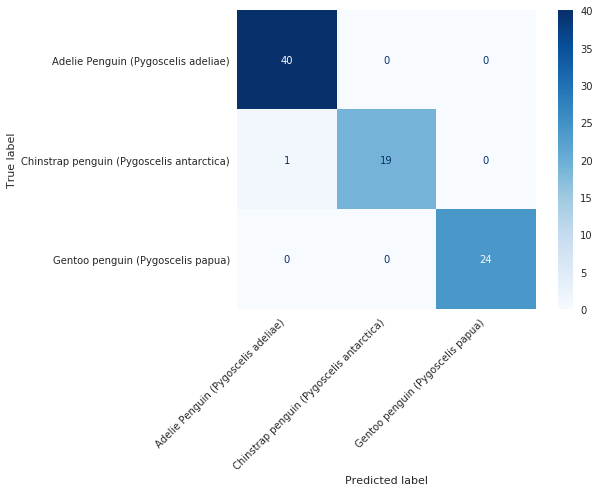

In [19]:
plot_confusion_matrix(model, Xtest, ytest, cmap=plt.cm.Blues)
plt.grid(False)
plt.yticks([0, 1, 2], labels=penguins.target_names)
plt.xticks([0, 1, 2], labels=penguins.target_names, rotation=45, ha="right");

In [20]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)
rf_scores = cross_val_score(model, penguins.data, penguins.target, cv=cv)

print("Logistic regression accuracy")
print(f"- average: {np.mean(rf_scores)}")
print(f"- CV folds: {rf_scores.tolist()}")

Logistic regression accuracy
- average: 0.9940298507462686
- CV folds: [0.9850746268656716, 0.9850746268656716, 1.0, 1.0, 1.0]
